# Apache Spark | Clustering

In this very simple example we test the K-Means algorithm provided by Apache Spark MLlib on a set of randomly generated points

In [3]:
# Import Spark
# NOTE: This may differ depending on your system!
import os
execfile(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.1.1
      /_/

Using Python version 2.7.13 (default, Dec 18 2016 07:03:39)
SparkSession available as 'spark'.


In [119]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.mllib.linalg import Vectors

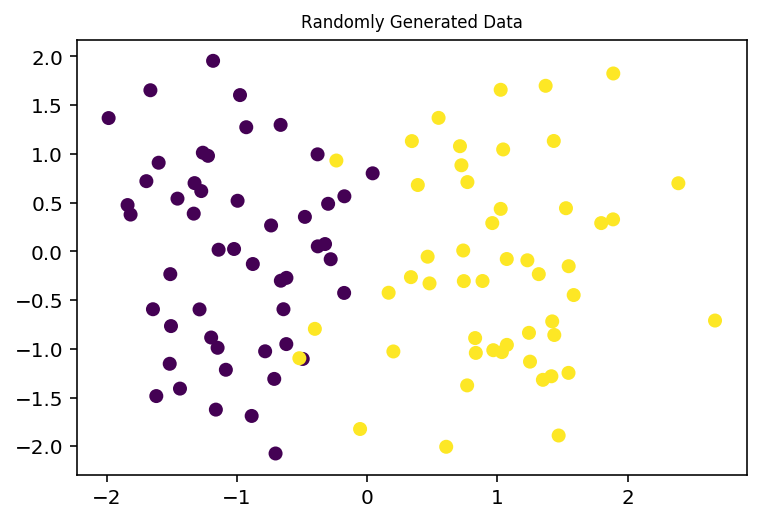

In [139]:
plt.title("Randomly Generated Data", fontsize='small')
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
points, clusters = make_classification(n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)
plt.scatter(points[:, 0], points[:, 1], marker='o', c=clusters)

In [140]:
data = sc.parallelize(points) # Converts the numpy array into an RDD
clusters_spk = KMeans.train(data, 2, maxIterations=100, initializationMode="random")
# Compute the clusters for the data and collect
clusters_pred = clusters_spk.predict(data).collect()

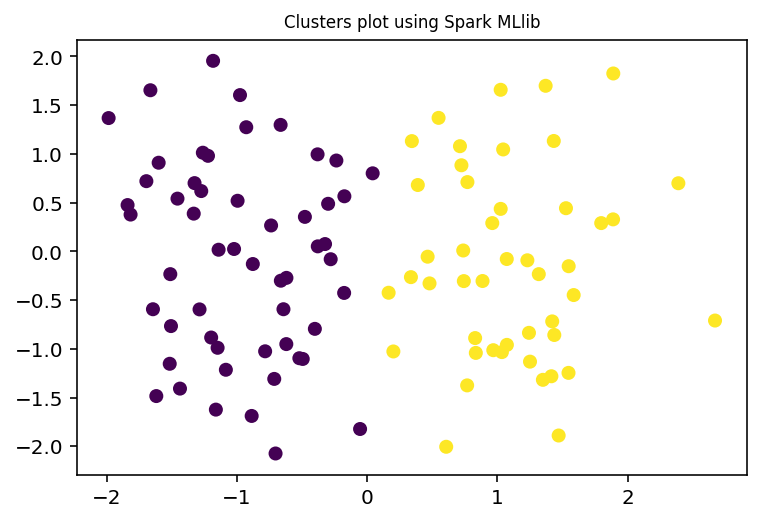

In [141]:
plt.title("Clusters plot using Spark MLlib", fontsize='small')
plt.scatter(points[:, 0], points[:, 1], marker='o', c=clusters_pred)